In [1]:
#Cargo las librerias que se usaran en esta notebook
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Leo el archivo fuente y lo guardo en un DF inicial
df_properatti = pd.read_csv('properatti.csv')

#Hago un overview de el contenido
df_properatti.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [4]:
#Chequeo algunas propiedades del df
df_properatti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [42]:
#Analizo las variables categoricas, cantidad de valores y valores. Variables con un solo valor no aportan valor
print('operation:', df_properatti['operation'].unique())
print('property_type:', df_properatti['property_type'].unique())
print('country_name:', df_properatti['country_name'].unique())
print('state_name:', df_properatti['state_name'].unique())
print('currency:', df_properatti['currency'].unique())
print('place_name:', df_properatti['place_name'].nunique())
print('place_with_parent_names:', df_properatti['place_with_parent_names'].nunique())
print('description:', df_properatti['description'].nunique())


operation: ['sell']
property_type: ['PH' 'apartment' 'house' 'store']
country_name: ['Argentina']
state_name: ['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Entre Ríos' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Córdoba'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Buenos Aires Interior' 'Salta'
 'Neuquén' 'Río Negro' 'San Luis' 'Mendoza' 'Corrientes' 'Chubut'
 'Tucumán' 'La Pampa' 'Chaco' 'San Juan' 'Santa Cruz' 'Tierra Del Fuego'
 'Catamarca' 'Santiago Del Estero' 'Jujuy' 'La Rioja' 'Formosa']
currency: ['USD' nan 'ARS' 'PEN' 'UYU']
place_name: 1060
place_with_parent_names: 1164
description: 104055


In [111]:
#Analizo valores nulos
df_nulls = df_properatti.isnull()
df_properatti.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
tipo_cambio                    20411
d

In [59]:
# Verifico duplicados
print('DF sin duplicados:',df_properatti.duplicated(subset=None, keep='first').shape)
print('DF Properatti:', df_properatti[['place_with_parent_names']].shape)

DF sin duplicados: (121220,)
DF Properatti: (121220, 1)


In [46]:
#Analizo la columna descripcion, tipo y contenido
type(df_properatti['description'])

pandas.core.series.Series

In [49]:
# el contenido del campo es un texto libre, con informacion que puede ser de importancia para determinar el precio de una casa
df_properatti['description'][0]

'2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

In [50]:
df_properatti['description'][10]

'Hermosa casa sin terminar de 3 dormitorios, baño, living comedor, cocina, cochera.Techo de Madera. Con escritura y servicios. Lote de 1514 metros.                     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

In [41]:
#Verifico si hay alguna propiedad que no tenga precio pero si tiene precio aprox
print('Local currency:',df_properatti[df_properatti['price'].isnull() & ~df_properatti['price_aprox_local_currency'].isnull()].shape)
print('USD:',df_properatti[df_properatti['price'].isnull() & ~df_properatti['price_aprox_usd'].isnull()].shape)

Local currency: (0, 26)
USD: (0, 26)


In [60]:
#La columna precio tiene valores en diferentes monedas, con el fin de llevar todos los precios a dolares, 
#chequeamos el tipo de cambio
df_properatti['tipo_cambio'] = df_properatti['price_aprox_local_currency'] / df_properatti['price_aprox_usd']
df_properatti['tipo_cambio'].unique()

array([17.6445    ,         nan, 17.64449974, ..., 17.64449995,
       17.64449998, 17.64449994])

In [68]:
print('Cantidad casas con currency UYU:',df_properatti[df_properatti['currency'] == 'UYU']['currency'].count())
print('Cantidad casas con currency UYU:',df_properatti[df_properatti['currency'] == 'PEN']['currency'].count())

Cantidad casas con currency UYU: 1
Cantidad casas con currency UYU: 2


In [70]:
df_properatti[df_properatti['currency'] == 'PEN']['price']

50387    380000.0
50388    950000.0
Name: price, dtype: float64

In [ ]:
########### En mi opinion aca tiene que venir la parte que hizo nico

In [71]:
#Creo una funcion para calcular P valor, que me ayude a determinar que si la distribucion de una variable es normal o no

def normal(x):
    '''La función recibe un array numerico y devuelve un booleano.
    True: cuando la distribución del array tiende a ser normal(si el array tiene entre 5 y 5000 valores usa shapiro,
          si tiene mas valores entonces usa kstest.
    False: cuando la distribución no es normal o cuando el array tiene menos de 5 valores.'''
    if len(x) < 5: #Si el array tiene menos de 5 valores, no se puede determinar si la distribucion es normal
        return False
    
    elif 5000 > len(x) > 5: #para arrays de hasta 5000 valores uso shapiro 
        return stats.shapiro(x)[1] < 0.05
        
    else:#para arrays de mas 5000 valores uso kstest
        return stats.kstest(df_properatti['price'], 'norm')[1] > 0.05

In [72]:
# Pruebo hacer la agrupaciòn por barrio con multiples variables numericas y varias agregaciones por cada variable
df_by_geo = df_properatti.groupby('place_with_parent_names',as_index=False).agg({'price':['min', 'max','mean', normal],
                                                                                 'price_aprox_local_currency':['min', 'max','mean',normal],
                                                                                 'price_aprox_usd'           :['min', 'max','mean',normal],
                                                                                 'price_usd_per_m2'          :['min', 'max','mean',normal],
                                                                                 'price_per_m2'              :['min', 'max','mean',normal],
                                                                                 'floor'                     :['mean'],
                                                                                 'expenses'                  :['min', 'max','mean'],
                                                                                 'surface_total_in_m2'       :['sum', 'mean'],
                                                                                 'surface_covered_in_m2'     :['sum', 'mean']})

C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [74]:
df_by_geo.shape

(1164, 29)

In [78]:
df_by_geo.head()

place_with_parent_names     price              \
                                                           min         max   
0               |Argentina|Bs.As. G.B.A. Zona Norte|   35000.0  13000000.0   
1       |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|   25000.0   5497731.0   
2  |Argentina|Bs.As. G.B.A. Zona Norte|Escobar| C...  195000.0    420000.0   
3  |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ac...  120000.0    639000.0   
4  |Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Al...  135000.0    138000.0   

                        price_aprox_local_currency                             \
            mean normal                        min          max          mean   
0  335730.803030  False                  455201.45  229378500.0  5.403796e+06   
1  350879.656000  False                  237496.38   42346800.0  4.628403e+06   
2  311666.666667  False                 3440677.50    7410690.0  5.499202e+06   
3  249529.411765   True                 2117340.00   11274835.5  4.402822e+06   
4  136500.000000  False                 2382007.50    2434941.0  2.408474e+06   

         price_aprox_usd     ...     price_per_m2              floor expenses  \
  normal             min     ...             mean normal        mean      min   
0  False        25798.49     ...      1969.086181  False         NaN      1.0   
1  False        13460.08     ...      4049.651331  False  165.666667      1.0   
2  False       195000.00     ...      1303.311966  False    9.000000      NaN   
3   True       120000.00     ...      1243.353871  False   42.000000   3000.0   
4  False       135000.00     ...       910.000000  False         NaN      NaN   

                        surface_total_in_m2             surface_covered_in_m2  \
       max         mean                 sum        mean                   sum   
0  15000.0  4159.208333            169843.0  898.640212               41709.0   
1  20000.0  5075.673575            238903.0  334.130070              177449.0   
2      NaN          NaN               551.0  275.500000                 725.0   
3   5000.0  4033.333333              5026.0  239.333333                6937.0   
4      NaN          NaN               300.0  150.000000                 300.0   

               
         mean  
0  198.614286  
1  181.255363  
2  241.666667  
3  210.212121  
4  150.000000  

[5 rows x 29 columns]

In [89]:
#Cantidad de lugares que tienen una distribucion normal del precio
df_by_geo[df_by_geo['price']['normal']==True].shape[0]

91

In [108]:
#Visualizacion de la distribucion normal de algunas zonas
barrio = df_by_geo[df_by_geo['price']['normal'] == True].iloc[4][0]
barrio


'|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Fincas del Lago|'

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


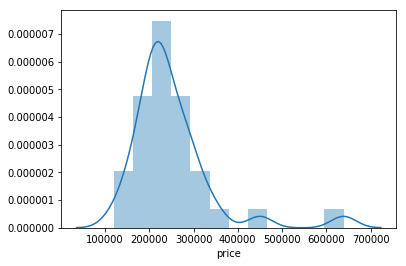

In [96]:
sns.distplot(df_properatti[(df_properatti['place_with_parent_names'] == barrio) &
                           (~df_properatti['price'].isnull())]['price'])

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


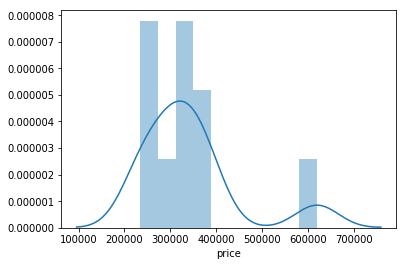

In [110]:
sns.distplot(df_properatti[(df_properatti['place_with_parent_names'] == barrio) &
                           (~df_properatti['price'].isnull())]['price'],bins = 10)

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


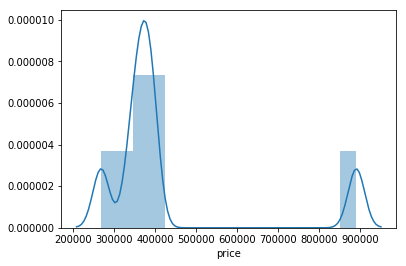

In [100]:
sns.distplot(df_properatti[(df_properatti['place_with_parent_names'] == barrio) &
                           (~df_properatti['price'].isnull())]['price'])

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


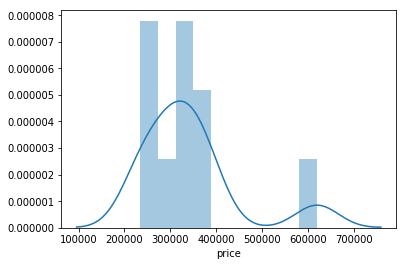

In [109]:
sns.distplot(df_properatti[(df_properatti['place_with_parent_names'] == barrio) &
                           (~df_properatti['price'].isnull())]['price'],bins=10)

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


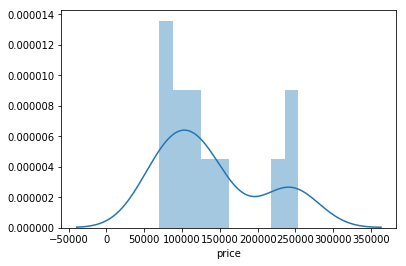

In [107]:
sns.distplot(df_properatti[(df_properatti['place_with_parent_names'] == barrio) &
                           (~df_properatti['price'].isnull())]['price'], bins = 10)

C:\Users\Lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


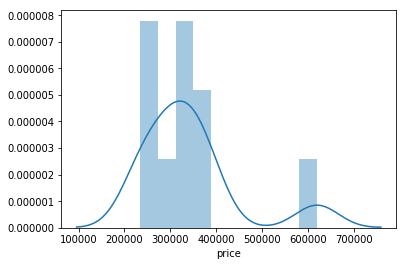

In [118]:
sns.distplot(df_properatti[(df_properatti['place_with_parent_names'] == barrio) &
                           (~df_nulls['price'])]['price'], bins = 10)

In [121]:
#not_null = ~df_nulls['price']
#barrio = df_by_geo[df_by_geo['price']['normal'] == True].iloc[10][0]
#df_price['place_with_parent_names'] == barrio
#df_properatti.loc[barrio & not_null,['price']].plot.hist(bins=30)